## Téléchargement des bibliothèques necessaires

In [180]:
# Téléchargement de packages
!pip install wordcloud
!pip install tensorflow

## Chargement des bibliothèques

In [181]:
# Chargement des packages
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Importation, Affichage et info de la base de données

In [182]:
data = pd.read_csv("Tweets.csv", encoding="UTF-8")
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [183]:
# Information sur la base de données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

### Affichage du nombre de lignes et de colonnes

In [184]:
# Afficher le nombre de lignes et de colonnes avant nettoyage des données 
print("Avant la suppression :")
print("Nombre de lignes :", data.shape[0])  
print("Nombre de colonnes :", data.shape[1])  

Avant la suppression :
Nombre de lignes : 14640
Nombre de colonnes : 15


In [185]:
data = data[['text', 'airline_sentiment']]
data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative


## Proportion pour chaque valeur de la variable d'intéret (airline_sentiment)

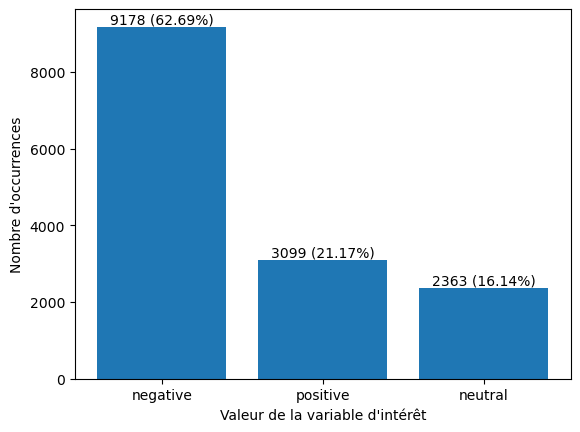

In [186]:
airline_sentiment_counts = data['airline_sentiment'].value_counts()

# Calculer la proportion pour chaque valeur de la variable d'intérêt (airline_sentiment)
airline_sentiment_proportions = data['airline_sentiment'].value_counts(normalize=True)

# Créer un graphique à barres pour visualiser la distribution
plt.bar(airline_sentiment_counts.index, airline_sentiment_counts.values)

# Ajouter les étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(airline_sentiment_counts):
    proportion = airline_sentiment_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiqueter l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajouter une légende aux barres
plt.xticks(airline_sentiment_counts.index, ['negative', 'positive', 'neutral'])

# Afficher le graphique
plt.show()

### Nombre de tweets vides

In [187]:
#des tweets vides aprés nettoyage
print(data.loc[data.text==""].shape[0])

0


### Un tweet ayant des emojis

In [188]:
data[18:19]

,text,airline_sentiment
18,I ❤️ flying @VirginAmerica. ☺️👍,positive


## Transformation des emojis en texte

In [189]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [190]:
import emoji

# Fonction pour traduire les emojis en texte
def translate_emojis(text):
    emoji_text = emoji.demojize(text)
    return emoji_text

# Appliquer la fonction à la colonne 'text'
data['text'] = data['text'].apply(translate_emojis)

# Afficher les premières lignes du DataFrame avec les emojis traduits en texte
print(data.head())

                                                text airline_sentiment
0                @VirginAmerica What @dhepburn said.           neutral
1  @VirginAmerica plus you've added commercials t...          positive
2  @VirginAmerica I didn't today... Must mean I n...           neutral
3  @VirginAmerica it's really aggressive to blast...          negative
4  @VirginAmerica and it's a really big bad thing...          negative


C:\Users\DELL\AppData\Local\Temp\ipykernel_15148\1138893190.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(translate_emojis)


## Affichage des ponctuations et des mots vides

In [191]:
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
#préparation des librairies et des outils pour le nettoyage des fichiers
#""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

#expressions réguliéres
import re
#ponctuations
import string

ponctuations = list(string.punctuation)
print('ponctuations:',ponctuations)

#tokénisation
import nltk 
nltk.download('punkt')

from nltk.tokenize import word_tokenize

#lematisation
nltk.download('wordnet')

#charger les stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords
mots_vides = stopwords.words('english')
print('\n')
print('Mots vides:',mots_vides)

ponctuations: ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


Mots vides: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'o

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Affichage d'un tweet dont les emojis sont transformés en texte

In [192]:
data[18:19]

,text,airline_sentiment
18,I :red_heart: flying @VirginAmerica. :smiling_...,positive


# Prétraitement des tweets
#### 1) Suppression des caractères spéciaux et des ponctuations
#### 2) Convertion du texte en minuscule
#### 3) Retrait des liens web
#### 4) Retrait des nombres
#### 5) Tokénisation du texte
#### 6) Suppression des mots vides
#### 7) Lémmatisation

In [193]:
# Importation des packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

nltk.download('stopwords')
nltk.download('punkt')


# Fonction de nettoyage
def clean_text(text):
    # Supprimer des caractères spéciaux et de la ponctuation
    text = re.sub(r"[^\w\s]", "", text)
    # Convertion en minuscule
    text = text.lower()
    #retrait des liens web (http et https)
    text = re.sub(r'http\S+','',text)
    #retrait des nombres
    text = re.sub("[0-9_]","",text)
    # Tokénisation du texte
    tokens = word_tokenize(text)
    # Suppression des mots vides
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]
    tokens # Affichage des tokens
    
    # Lemmatisation
    lem=WordNetLemmatizer()
    lemmatisation = [lem.lemmatize(mot) for mot in tokens]
    
    # Joindre les tokens en une seule chaine
    cleaned_text = "".join(mot for mot in lemmatisation)
    
    return cleaned_text

# Appliquer le nettoyage sur la colonne texte
data['text'] = data['text'].apply(clean_text)
data

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\DELL\AppData\Local\Temp\ipykernel_15148\2108140277.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(clean_text)


,text,airline_sentiment
0,virginamericadhepburnsaid,neutral
1,virginamericaplusyouveaddedcommercialexperienc...,positive
2,virginamericadidnttodaymustmeanneedtakeanother...,neutral
3,virginamericareallyaggressiveblastobnoxiousent...,negative
4,virginamericareallybigbadthing,negative
...,...,...
14635,americanairthankgotdifferentflightchicago,positive
14636,americanairleavingminutelateflightwarningcommu...,negative
14637,americanairpleasebringamericanairlineblackberry,neutral
14638,americanairmoneychangeflightdontanswerphonesug...,negative


### Remplacement des valeurs de la variable airline_sentiment  en numérique

In [ ]:
# -1 si le text analyse d'opinion : negative (negative)
# 0 si le text analyse d'opinion : neutral (neutre)
# 1 si le text analyse d'opinion : positive (positive)

class_map={'negative':-1, 'neutral':0, 'positive':1}
print(class_map['negative'])
print(class_map['neutral'])
print(class_map['positive'])

In [195]:
data["airline_sentiment"]=data["airline_sentiment"].apply(lambda x:class_map[x])
data

C:\Users\DELL\AppData\Local\Temp\ipykernel_15148\3738828668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["airline_sentiment"]=data["airline_sentiment"].apply(lambda x:class_map[x])


,text,airline_sentiment
0,virginamericadhepburnsaid,0
1,virginamericaplusyouveaddedcommercialexperienc...,1
2,virginamericadidnttodaymustmeanneedtakeanother...,0
3,virginamericareallyaggressiveblastobnoxiousent...,-1
4,virginamericareallybigbadthing,-1
...,...,...
14635,americanairthankgotdifferentflightchicago,1
14636,americanairleavingminutelateflightwarningcommu...,-1
14637,americanairpleasebringamericanairlineblackberry,0
14638,americanairmoneychangeflightdontanswerphonesug...,-1


### Elimination des tweets neutres et remplacement des valeurs négatifs par 0

In [196]:
data = data[data['airline_sentiment'] != 0]
data

,text,airline_sentiment
1,virginamericaplusyouveaddedcommercialexperienc...,1
3,virginamericareallyaggressiveblastobnoxiousent...,-1
4,virginamericareallybigbadthing,-1
5,virginamericaseriouslywouldpayflightseatdidntp...,-1
6,virginamericayesnearlyeverytimeflyvxearwormwon...,1
...,...,...
14633,americanairflightcancelledflightledleavingtomo...,-1
14634,americanairrightcuedelaysokhand,-1
14635,americanairthankgotdifferentflightchicago,1
14636,americanairleavingminutelateflightwarningcommu...,-1


In [197]:
data['airline_sentiment'] = data['airline_sentiment'].replace(-1, 0)
data

C:\Users\DELL\AppData\Local\Temp\ipykernel_15148\834913617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['airline_sentiment'] = data['airline_sentiment'].replace(-1, 0)


,text,airline_sentiment
1,virginamericaplusyouveaddedcommercialexperienc...,1
3,virginamericareallyaggressiveblastobnoxiousent...,0
4,virginamericareallybigbadthing,0
5,virginamericaseriouslywouldpayflightseatdidntp...,0
6,virginamericayesnearlyeverytimeflyvxearwormwon...,1
...,...,...
14633,americanairflightcancelledflightledleavingtomo...,0
14634,americanairrightcuedelaysokhand,0
14635,americanairthankgotdifferentflightchicago,1
14636,americanairleavingminutelateflightwarningcommu...,0


### Proportion pour chaque valeur de la variable d'intéret (airline_sentiment) après suppression des tweets neutres

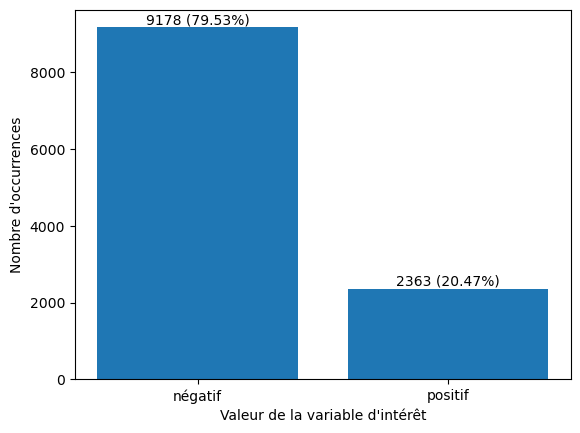

In [199]:
airline_sentiment_counts = data['airline_sentiment'].value_counts()

# Calculer la proportion pour chaque valeur de la variable d'intérêt (airline_sentiment)
airline_sentiment_proportions = data['airline_sentiment'].value_counts(normalize=True)

# Créer un graphique à barres pour visualiser la distribution
plt.bar(airline_sentiment_counts.index, airline_sentiment_counts.values)

# Ajouter les étiquettes des barres (nombre d'occurrences et proportion)
for i, count in enumerate(airline_sentiment_counts):
    proportion = airline_sentiment_proportions[i]
    plt.text(i, count, f"{count} ({proportion:.2%})", ha='center', va='bottom')

# Étiqueter l'axe des x et y
plt.xlabel('Valeur de la variable d\'intérêt')
plt.ylabel('Nombre d\'occurrences')

# Ajouter une légende aux barres
plt.xticks(airline_sentiment_counts.index, ['négatif', 'positif'])

# Afficher le graphique
plt.show()

### Génération du wordcloud pour la visualisation des mots ou tokens (positifs et négatifs)

In [200]:
# Fonction pour génerer le word cloud
def generer_wordcloud(tweets, titre):
    tout_texte = ' '.join(tweets)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tout_texte)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(titre, fontsize=14)
    plt.axis('off')
    plt.show()

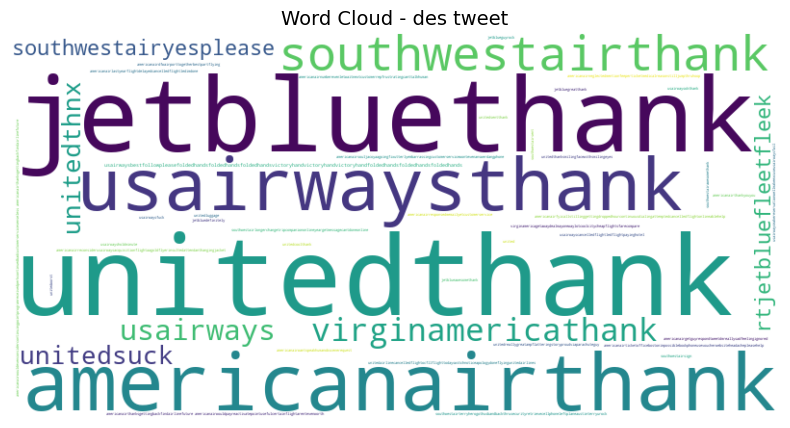

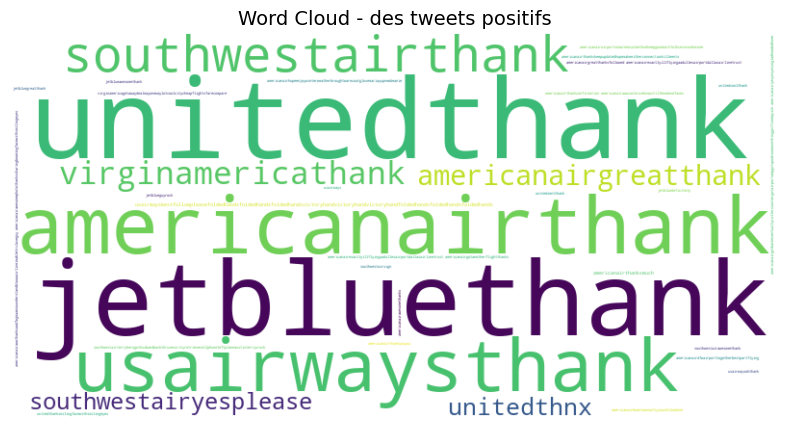

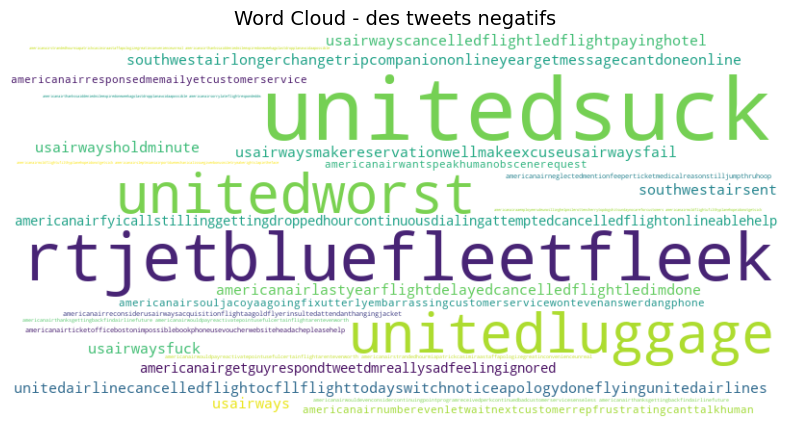

In [201]:
# générer le wordcloud pour chaque type de sentiment (positif, négatif et neutre)
generer_wordcloud(data['text'], 'Word Cloud - des tweet')
# Filtrer les tweets positifs
tweets_positifs = data[data['airline_sentiment'] == 1]['text']
generer_wordcloud(tweets_positifs, 'Word Cloud - des tweets positifs')
# Filtrer les tweets négatifs
tweets_negatifs = data[data['airline_sentiment'] == 0]['text']
generer_wordcloud(tweets_negatifs, 'Word Cloud - des tweets negatifs')

# Modélisation

### Division des données en ensemble d'entrainement et de test

In [202]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['airline_sentiment'], test_size=0.2, stratify=data['airline_sentiment'], random_state=0)

In [203]:
data.shape

(11541, 2)

### Choix de l'algorithme SVM

In [204]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Définir le modèle SVM avec un TfidfVectorizer
svm_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC(kernel='linear', C=1, random_state=0))
])

# Entraîner le modèle SVM
svm_model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = svm_model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.809008
Confusion Matrix:
[[1835    1]
 [ 440   33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1836
           1       0.97      0.07      0.13       473

    accuracy                           0.81      2309
   macro avg       0.89      0.53      0.51      2309
weighted avg       0.84      0.81      0.74      2309



## Comparaison avec les autres algorithmes 
### 1) Logistic Regression

In [205]:
# Définir le modèle de RÉGRESSION LOGISTIQUE avec un TfidfVectorizer
lr_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression(solver='liblinear', random_state=0))
])
# Construction du Modèle
lr_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(random_state=0, solver='liblinear'))])

In [206]:
# Calcul du taux de performance du Modèle
y_pred = lr_model.predict(X_test)
accuracy = lr_model.score(X_test, y_test)
print('Accuracy Logistic Regression Test: ', accuracy)

Accuracy Logistic Regression Test:  0.8029449978345604


In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1836
           1       1.00      0.04      0.07       473

    accuracy                           0.80      2309
   macro avg       0.90      0.52      0.48      2309
weighted avg       0.84      0.80      0.72      2309



### 2) Arbre de décision

In [208]:
# Importation des bibliothèques
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [209]:
# Définir le modèle d'ARBRE DE DECISION avec un TfidfVectorizer
ad_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('ad', tree.DecisionTreeClassifier())
])
# Construction d'un arbre de décision
ad_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('ad', DecisionTreeClassifier())])

In [210]:
# Calcul du taux de performance
accAD = ad_model.score(X_test, y_test)
print('Accuracy Arbre Decision Test: ', accAD)

Accuracy Arbre Decision Test:  0.8090082286704201


In [211]:
y_predDT = ad_model.predict(X_test)
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      1836
           1       0.97      0.07      0.13       473

    accuracy                           0.81      2309
   macro avg       0.89      0.53      0.51      2309
weighted avg       0.84      0.81      0.74      2309



### 3) KNN

In [212]:
# Importation des bibliothèques
from sklearn.neighbors import KNeighborsClassifier

In [213]:
# Définir le modèle KNN avec un TfidfVectorizer
knn_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=1))
])
# Construction du modèle KNN
knn_model.fit(X_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [214]:
# Calcul du taux de performance
score = knn_model.score(X_test, y_test)
print('Accuracy KNN Test: ', score)

Accuracy KNN Test:  0.22044174967518407


In [215]:
y_predKNN = knn_model.predict(X_test)
print(classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

           0       0.95      0.02      0.04      1836
           1       0.21      1.00      0.34       473

    accuracy                           0.22      2309
   macro avg       0.58      0.51      0.19      2309
weighted avg       0.80      0.22      0.10      2309



# Deep Learning

### 1) Mono couche

In [216]:
# Chargement des packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [217]:
# Tokenisation
max_words = 5000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Remplissage des séquences
max_len = max(len(x) for x in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Création du modèle avec une seule couche
embedding_dim = 128
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
batch_size = 64
epochs = 5
model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_pad, y_test))

# Évaluer le modèle
accuracy = model.evaluate(X_test_pad, y_test)[1]
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 1/5
145/145 [==============================] - 3s 11ms/step - loss: 0.6103 - accuracy: 0.7411 - val_loss: 0.4972 - val_accuracy: 0.8055
Epoch 2/5
145/145 [==============================] - 1s 9ms/step - loss: 0.5316 - accuracy: 0.8621 - val_loss: 0.4928 - val_accuracy: 0.8077
Epoch 3/5
145/145 [==============================] - 1s 9ms/step - loss: 0.4306 - accuracy: 0.9158 - val_loss: 0.4902 - val_accuracy: 0.8077
Epoch 4/5
145/145 [==============================] - 1s 8ms/step - loss: 0.3196 - accuracy: 0.9161 - val_loss: 0.4870 - val_accuracy: 0.8077
Epoch 5/5
73/73 [==============================] - 0s 3ms/step - loss: 0.4873 - accuracy: 0.8077
Accuracy: 80.77%


## Visualisation

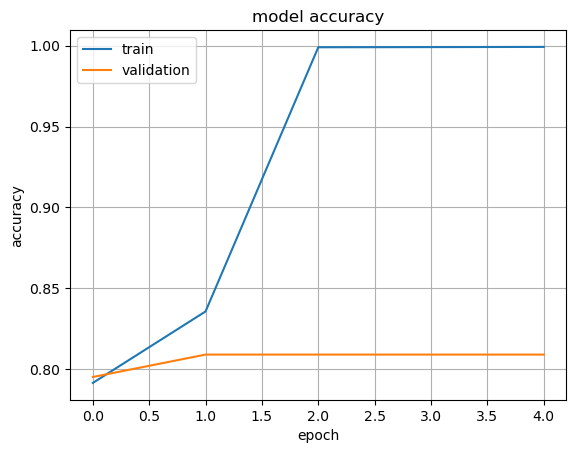

In [218]:
# Précision graphique
import matplotlib.pyplot as plt

# Evolution de la précision
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
# Ajouter une grille pour faciliter la lecture
plt.grid(True)
plt.show()

### 2) Multi couche

In [220]:
# Tokenisation
max_words = 50000
tokenizer = Tokenizer(num_words=max_words, split=' ')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Remplissage des séquences
max_len = max(len(x) for x in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Création du modèle
embedding_dim = 128
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
batch_size = 64
epochs = 5
history =model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test_pad, y_test))

# Évaluer le modèle
accuracy = model.evaluate(X_test_pad, y_test)[1]
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch 1/5
145/145 [==============================] - 15s 48ms/step - loss: 0.5902 - accuracy: 0.7906 - val_loss: 0.5077 - val_accuracy: 0.7951
Epoch 2/5
145/145 [==============================] - 5s 37ms/step - loss: 0.3186 - accuracy: 0.8386 - val_loss: 0.4861 - val_accuracy: 0.8090
Epoch 3/5
145/145 [==============================] - 6s 38ms/step - loss: 0.0163 - accuracy: 0.9992 - val_loss: 0.4888 - val_accuracy: 0.8090
Epoch 4/5
145/145 [==============================] - 6s 38ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.4893 - val_accuracy: 0.8090
Epoch 5/5
73/73 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.8090
Accuracy: 80.90%


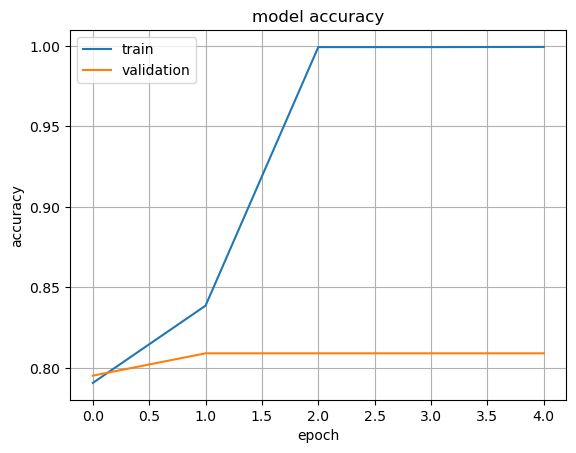

In [221]:
# Précision graphique
import matplotlib.pyplot as plt

# Evolution de la précision
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
# Ajouter une grille pour faciliter la lecture
plt.grid(True)
plt.show()